# Rappresenta i punti iniziali e quelli del poligono ottimale

Come nel precedente notebook-05, si rappresenta la circonferenza ottimale i punti iniziali effettivi e, in verde, quelli del poligono geometrico (che essendo molto vicini per gli ottagoni, appaiono praticamente sovrapposti).

Vedere il notebook-5 per maggiori dettagli e, per una visualizzazione finale migliore provare con i dati del quadrato.

@author: lorenzo

In [1]:
from scipy import optimize
import numpy as np
from math import sqrt, pi
import matplotlib.pyplot as plt

In [2]:
def calc_R(x, y, xc, yc):
    return np.sqrt((x-xc)**2 + (y-yc)**2)

def f(c, x, y):
    Ri = calc_R(x, y, *c)
    return Ri - Ri.mean()

def least_squares_circle(coords):
    x, y = None, None
    if isinstance(coords, np.ndarray):
        x = coords[:, 0]
        y = coords[:, 1]
    elif isinstance(coords, list):
        x = np.array([point[0] for point in coords])
        y = np.array([point[1] for point in coords])
    else:
        raise Exception("Il parametro 'coords' è di un tipo non supportato: " + str(type(coords)))

    # coordinate del baricentro
    x_m = np.mean(x)
    y_m = np.mean(y)
    center_estimate = x_m, y_m
    center, _ = optimize.leastsq(f, center_estimate, args = (x, y))
    xc, yc = center
    Ri = calc_R(x, y, *center)
    R = Ri.mean()
    residui = np.sum((Ri - R)**2)
    return xc, yc, R, residui

In [3]:
# Genera il poligono regolare geometrico
def poligonoRegolare(alfa, pars):
    xPolMobile = []
    yPolMobile = []
    for n in pars[5]:
        xPolMobile.append(pars[0] + pars[2]*np.cos(n*(2*pi/pars[6])+alfa+0.2))
        yPolMobile.append(pars[1] + pars[2]*np.sin(n*(2*pi/pars[6])+alfa+0.2))
    return xPolMobile, yPolMobile

def sommaQuad(alfa, pars):
    dim = len(alfa)
    verticiUtilizzati = len(pars[5])
    xPolMobile, yPolMobile = poligonoRegolare(alfa, pars)
    difxq = (np.broadcast_to(pars[3],(dim,verticiUtilizzati)) - np.transpose(xPolMobile))**2
    difyq = (np.broadcast_to(pars[4],(dim,verticiUtilizzati)) - np.transpose(yPolMobile))**2
    somma = sum(np.transpose(difxq + difyq))
    return somma

def individuaNAN(x):
    return np.where(np.isnan(x))

Seguono istruzioni grafiche

In [4]:
def plot_data_circle(x, y, xc, yc, R):
    """
      Plot i dati e la circonferenza ottimale.
      Inputs:
            x : dati, x values (array)
            y : dati, y values (array)
            xc : ascissa del centro 
            yc : ordinata del centro
            R : raggio della circonferenza ottimale

      Output:
           None (genera un plot matplotlib).
    """
    f = plt.figure(facecolor = 'white')
    plt.axis('equal')

    theta_fit = np.linspace(-pi, pi, 180)

    x_fit = xc + R*np.cos(theta_fit)
    y_fit = yc + R*np.sin(theta_fit)
    plt.plot(x_fit, y_fit, 'b-', label = " circonferenza ottimale", lw = 2)
    plt.plot([xc], [yc], 'bD', mec = 'y', mew = 1)
    plt.xlabel('x')
    plt.ylabel('y')
    # plot i dati
    plt.scatter(x, y, c = 'red', label = 'dati')

    plt.legend(loc = 'best', labelspacing = 0.1)
    plt.grid()
    plt.title('Circonferenza ottimale')

Viene letto il file dei dati

In [9]:
data = np.loadtxt("datiOrdinatiInt.csv", delimiter = ",")

xdata = data[:, 0]
ydata = data[:, 1]

numLati = len(xdata)
indiceN = np.arange(0, numLati, 1)  
#costruisco le terne ciascuna delle quali esprime [indice, xdato, ydato]
terne=np.transpose(np.array([indiceN, xdata, ydata]))
# indici di dove compaiono elementi non numerici NaN
indiciNAN = individuaNAN(terne)
# elimina le terne contenenenti una o piu' NaN
terne = np.delete(terne, indiciNAN[0], 0)
# riassegna i dati effettivi 
[indiciEffettivi, xdata, ydata] = np.transpose(terne)

coords = np.transpose([xdata, ydata])
xc, yc, r, s = least_squares_circle(coords)
par = [xc, yc, r, xdata, ydata, indiciEffettivi, numLati]

Le istruzioni successive forniscono a video gli esiti. Il termine fun fornisce il valore del minimo della funzione mentre l'ultimo (x) l'angolo in corrispondenza del quale lo si ottiene.

----------+++-----------
ascissaCentro =  34.96123480743832   ordinataCentro =  -0.9728377110489871   raggio =  9.681332768676825
----------+++-----------
      fun: 0.002370174153330864
 hess_inv: array([[0.00088911]])
      jac: array([-3.16678779e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([0.15944277])
----------+++-----------


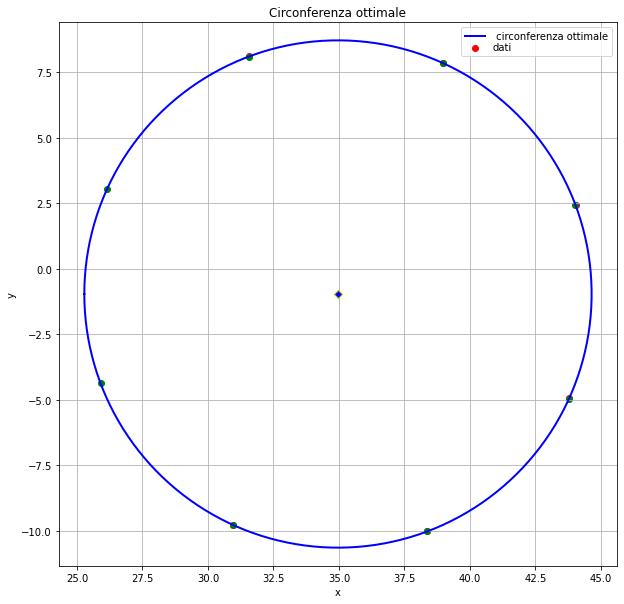

In [10]:
print('----------+++-----------')
print('ascissaCentro = ',xc,'  ordinataCentro = ',yc,'  raggio = ',r)
print('----------+++-----------')
diz = optimize.minimize(sommaQuad, 0, (par))
print(diz)
print('----------+++-----------')
# grafico della circonferenza ottimale e dei punti iniziali
plt.rcParams['figure.figsize'] = [10, 10]
plot_data_circle(xdata, ydata, xc, yc, r)
# Nel caso che il numero dei vertici utilizzati sia minore del numero dei lati
if numLati > len(indiciEffettivi):
    par[5] = range(numLati)
# traccia circ. e punti teorici poligono
plt.scatter(poligonoRegolare(diz.x[0],par)[0], poligonoRegolare(diz.x[0],par)[1], c = 'green', label = 'puntiOttimali')
plt.show()